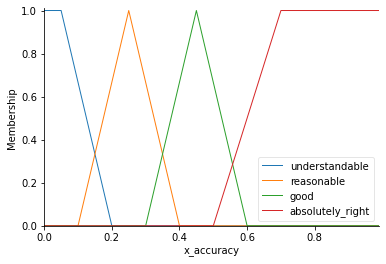

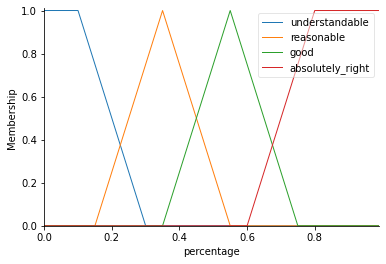

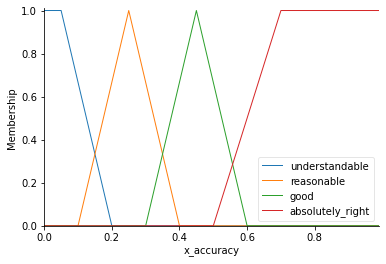

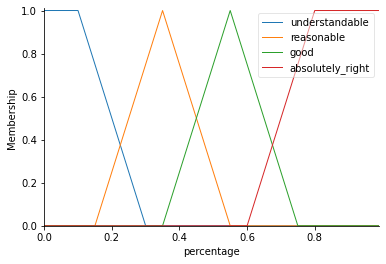

In [1]:
# Import packages
import numpy as np
import geopandas
import os
from fuzz_accuracy import FuzzyAccuracy
import matplotlib.pyplot as plt
from sklearn import preprocessing
FA = FuzzyAccuracy()

In [73]:
scratch_path = os.environ['SCRATCH']
input_folder = "covid-map/map/csp9-2w-v1/"
output_folder = "covid-map/map/csp9-2w-accuracy"


file_list = [x for x in os.listdir(os.path.join(scratch_path, input_folder)) if x.endswith("geojson")]

input_path_list = [os.path.join(scratch_path, input_folder, x) for x in file_list]
output_path_list = [os.path.join(scratch_path, output_folder, x) for x in file_list]

def batch_process(input_path_list, output_path_list):
    for input_path, output_path in zip(input_path_list, output_path_list):
        gdf = geopandas.read_file(input_path)
        topic_df = gdf['phq_level'].apply(lambda x: gdf[x])
        gdf['phq_level_percentage'] = topic_df.values.diagonal() 
        gdf['fuzzy_accuracy'] = gdf['phq_level_percentage'].apply(lambda x: FA.caculate(x))
#         return gdf
        print("writing to", output_path)
        gdf.to_file(output_path, driver='GeoJSON')
    print("all done")
    return gdf

In [74]:
gdf = batch_process(input_path_list, output_path_list)

writing to /scratch/user/diya.li/covid-map/map/csp9-2w-accuracy/2020-03-22.geojson
writing to /scratch/user/diya.li/covid-map/map/csp9-2w-accuracy/2020-04-05.geojson
writing to /scratch/user/diya.li/covid-map/map/csp9-2w-accuracy/2020-04-19.geojson
writing to /scratch/user/diya.li/covid-map/map/csp9-2w-accuracy/2020-03-08.geojson
writing to /scratch/user/diya.li/covid-map/map/csp9-2w-accuracy/2020-02-23.geojson
writing to /scratch/user/diya.li/covid-map/map/csp9-2w-accuracy/2020-01-26.geojson
writing to /scratch/user/diya.li/covid-map/map/csp9-2w-accuracy/2020-02-09.geojson
all done


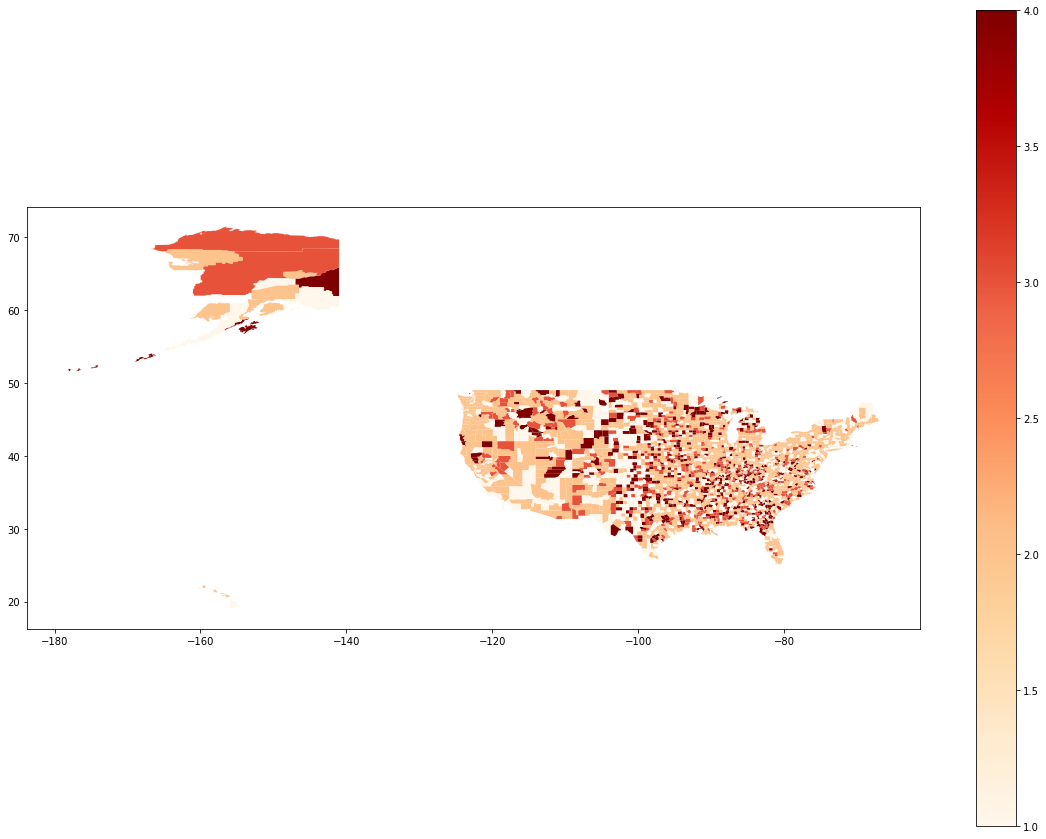

In [72]:
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
gdf.plot(column="fuzzy_accuracy", ax=ax, legend=True, cmap="OrRd")

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
gdf.plot(column="fuzzy_accuracy", ax=ax, legend=True, cmap="OrRd")

In [6]:
gdf = geopandas.read_file("/scratch/user/diya.li/covid-map/map/csp9-2w-accuracy/2020-04-19.geojson")

In [3]:
import seaborn as sns
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
sns.set(style="whitegrid")
def scale_list(input_list, scale_range=(0,1)):
    # scale a data matrix to the [0, 1]
    return preprocessing.minmax_scale(X = input_list, feature_range=scale_range, axis=0, copy=True)

In [4]:
# df = gdf[['cnty_fips','phq_level_index', 'stress_rate']]

In [5]:
# df['stress_rate'] = scale_list(df['stress_rate'], scale_range=(0.1,1))
# g = sns.jointplot("phq_level_index", "stress_rate", data=df,
#                   kind="reg", truncate=False,
#                   xlim=(-1, 9), ylim=(0, 1),
#                   color="b")

In [6]:
scratch_path = os.environ['SCRATCH']
df_folder = os.path.join(scratch_path, "covid-map/twitter-dataset-processed-topic-2W")
df_folder_list = [os.path.join(df_folder, x) for x in os.listdir(df_folder) if x.endswith("csv")]

In [7]:
topic_columns = ['topic_'+str(x) for x in range(9)]
topic_columns

['topic_0',
 'topic_1',
 'topic_2',
 'topic_3',
 'topic_4',
 'topic_5',
 'topic_6',
 'topic_7',
 'topic_8']

In [8]:
stress_rate_list = []
topic_0 = []
topic_1 = []
topic_2 = []
topic_3 = []
topic_4 = []
topic_5 = []
topic_6 = []
topic_7 = []
topic_8 = []
for df_path in df_folder_list:
    topic_set = dict()
    df = pd.read_csv(df_path, lineterminator="\n")
    df = df[df['stress_rate'].notnull()]
    stress_rate_list.extend(df['stress_rate'].values.tolist())
    stress_rate_list = scale_list(stress_rate_list, scale_range=(0.1,1))
    stress_rate_list = stress_rate_list.tolist()
    topic_0.extend(df['topic_0'].values.tolist())
    topic_1.extend(df['topic_1'].values.tolist())
    topic_2.extend(df['topic_2'].values.tolist())
    topic_3.extend(df['topic_3'].values.tolist())
    topic_4.extend(df['topic_4'].values.tolist())
    topic_5.extend(df['topic_5'].values.tolist())
    topic_6.extend(df['topic_6'].values.tolist())
    topic_7.extend(df['topic_7'].values.tolist())
    topic_8.extend(df['topic_8'].values.tolist())
    
    print(len(stress_rate_list))
    print((len(topic_0)+len(topic_1)+len(topic_2)+len(topic_3)+len(topic_4)+len(topic_5)+len(topic_6)+len(topic_7)+len(topic_8))/9)

898851
898851.0
2191988
2191988.0
3937819
3937819.0
4289081
4289081.0
4540414
4540414.0
4930153
4930153.0
5296400
5296400.0


In [10]:
new_df = pd.DataFrame(stress_rate_list, columns = ["stress_rate"])
new_df['phq_0'] = topic_0
new_df['phq_1'] = topic_1
new_df['phq_2'] = topic_2
new_df['phq_3'] = topic_3
new_df['phq_4'] = topic_4
new_df['phq_5'] = topic_5
new_df['phq_6'] = topic_6
new_df['phq_7'] = topic_7
new_df['phq_8'] = topic_8

In [11]:
from tqdm import tqdm

def caculate_topic(s, t0, t1, t2, t3, t4, t5, t6, t7, t8):
    result = 0
    result = (t0 + t1 + t2 + t3 + t4 + t5 + t6 + t7 + t8)/9
    return (1+s)*result

new_df['phq_level'] = new_df.apply(lambda x: caculate_topic(
    x['stress_rate'],
    x['phq_0'],
    x['phq_1'],
    x['phq_2'],
    x['phq_3'],
    x['phq_4'],
    x['phq_5'],
    x['phq_6'],
    x['phq_7'],
    x['phq_8'],  
), axis = 1)

In [ ]:
# g = sns.jointplot("phq_level_index", "stress_rate", data=df,
#                   kind="reg", truncate=False,
#                   xlim=(-1, 9), ylim=(0, 1),
#                   color="b")

In [45]:
new_df.head()

,stress_rate,phq_0,phq_1,phq_2,phq_3,phq_4,phq_5,phq_6,phq_7,phq_8
0,0.651610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.530330,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.523309,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.522849,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,0.552364,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
